# Final assignment Classical Data Analysis
Ruben Tak

### Assignemnt
Your company, DS Pros, would like to win a contract with a big city council as it would give us great PR. To do so you think it would be a great idea to proactively browse in the open data sets of this city (the one you choose, total freedom here) identify a situation that could be solved or improved using classification algorithms and present it to the technical office of that city council.

You need to prepare the following:

- A presentation describing the solution you try to solve, how classification will solve it and a summary of the solution proposed
- A well documented and visually appealing notebook where you try different models, explain the steps followed and chose one particular algorithm and hyperparameters (explaining why)
- You should also export that model, once trained, using pickle or similar so it can be reused.
- You should implement a .py script that loads the exported model, accepts a file with samples to classify (identified with an id) and stores the results in a DDBB table (SQLlite) with fields id and class.
- You should provide the files to test the .py script and clear instructions on how to run it.

https://www.kaggle.com/datasets/vonline9/weather-istanbul-data-20092019

Presentation:

Slide 1: Introduction
Introduce DS Pros and the objective of winning a contract with a city council.
Explain the importance of leveraging open data sets to identify opportunities for improvement.
Provide an overview of the solution and its potential benefits.

Slide 2: Problem Statement
Describe the problem of inefficient resource allocation based on weather conditions in Istanbul.
Explain how proactive decision-making can enhance the city council's operations and public services.
Emphasize the significance of classifying weather conditions accurately.

Slide 3: Solution Overview
Outline the proposed solution of using classification algorithms to predict weather conditions.
Describe how these predictions can aid the city council in optimizing resource allocation and improving service delivery.
Highlight the advantages of timely and accurate weather classification.

Slide 4: Classification Approach
Explain the steps involved in the classification process using weather data.
Emphasize the use of historical weather data for training and evaluation.
Describe the relevance of features such as Rain, MaxTemp, MinTemp, AvgWind, AvgHumidity, and AvgPressure for classification.

Slide 5: Model Selection
Discuss the different classification algorithms considered, such as Decision Trees, Random Forest, and Support Vector Machines.
Present the selected algorithm (e.g., Random Forest) and explain the reasons behind the choice, such as its ability to handle multiple features, handle non-linear relationships, and handle imbalanced data.

Slide 6: Model Training and Evaluation
Describe the steps followed in preprocessing the data, including handling missing values, feature scaling, and encoding categorical variables (if any).
Explain the process of splitting the dataset into training and testing sets.
Highlight the evaluation metrics used, such as accuracy, precision, recall, and F1-score.

Slide 7: Model Hyperparameters
Discuss the importance of hyperparameter tuning to improve model performance.
Explain the specific hyperparameters tuned for the chosen algorithm.
Present the final hyperparameter values and discuss their impact on the model's performance.

Slide 8: Model Export
Demonstrate the use of pickle or a similar library to export the trained model.
Explain how the exported model can be reused for future predictions.

Slide 9: .py Script Overview
Describe the Python script that loads the exported model and performs classification on new data.
Explain how the script accepts a file with samples to classify, identified with an ID.
Discuss the storage of results in an SQLlite database table with fields ID and class.

Slide 10: Testing the .py Script
Provide clear instructions on how to test the script.
Offer a sample dataset file for classification and explain the format.
Explain the necessary steps to install dependencies and run the script successfully.

Slide 11: Conclusion
Summarize the problem, solution, and potential benefits.
Highlight the significance of accurate weather classification for efficient resource allocation.
Express confidence in DS Pros' ability to provide valuable insights to the city council.

Notebook:
1. Import Dependencies: Start by importing the necessary libraries such as pandas, numpy, scikit-learn, pickle, and sqlite3.

2. Load and Explore the Dataset: Read the weather data from Istanbul into a pandas DataFrame. Use various DataFrame methods to explore the dataset, check for missing values, and gain a better understanding of the data distribution.

3. Data Preprocessing: Perform data preprocessing steps to ensure the data is in a suitable format for model training. This may include handling missing values, encoding categorical variables (if any), feature scaling, and splitting the dataset into training and testing sets.

4. Feature Selection: Analyze the relevance of each feature and select the most informative ones for classification. You can use techniques like correlation analysis, feature importance from a tree-based model, or domain knowledge to make the selection.

5. Model Selection and Training: Choose a classification algorithm that best suits the problem at hand. Consider algorithms like Decision Trees, Random Forest, Support Vector Machines, or any other algorithm you find appropriate. Train the selected model on the training set.

6. Model Evaluation: Evaluate the trained model's performance on the testing set using appropriate evaluation metrics like accuracy, precision, recall, and F1-score. Analyze the results to assess the model's effectiveness in classifying weather conditions.

7. Hyperparameter Tuning: Fine-tune the hyperparameters of the chosen model to optimize its performance. Use techniques like GridSearchCV or RandomizedSearchCV to search for the best combination of hyperparameters.

8. Export Trained Model: Once you have finalized the model and its hyperparameters, export the trained model using pickle or a similar library. This exported model will be used in the .py script for classification.

9. Visualizations: Create visualizations to present the analysis, model performance, and any other relevant insights. Use libraries like matplotlib or seaborn to create informative and visually appealing plots.

10. Conclusion and Next Steps: Summarize the findings and conclusions from the notebook. Discuss any potential further steps or improvements that can be made to enhance the classification solution.

.py Script:
Develop a Python script that loads the exported model, accepts a file with samples to classify, and stores the results in an SQLlite database table.
Ensure the script is well-documented and follows best practices for readability and maintainability.
Include error handling to provide meaningful error messages if the input file or database connection encounters issues.
Provide clear instructions on how





# 1. Import Dependencies

In [308]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
from tensorflow import keras

# 2. Load and Explore the Dataset

In [309]:
# Load data
df = pd.read_csv('data/Istanbul Weather Data.csv')

In [310]:
# Check data
df.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012
1,01.09.2019,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011
2,31.08.2019,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015
3,30.08.2019,Partly cloudy,0.0,27,22,06:29:00,19:42:00,6:4:00,20:5:00,20,64,1016
4,29.08.2019,Partly cloudy,0.0,27,23,06:27:00,19:43:00,4:47:00,19:26:00,24,61,1015


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     3896 non-null   object 
 1   Condition    3896 non-null   object 
 2   Rain         3896 non-null   float64
 3   MaxTemp      3896 non-null   int64  
 4   MinTemp      3896 non-null   int64  
 5   SunRise      3896 non-null   object 
 6   SunSet       3896 non-null   object 
 7   MoonRise     3764 non-null   object 
 8   MoonSet      3765 non-null   object 
 9   AvgWind      3896 non-null   int64  
 10  AvgHumidity  3896 non-null   int64  
 11  AvgPressure  3896 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 365.4+ KB


In [312]:
# list columns
df.columns

Index(['DateTime', 'Condition', 'Rain', 'MaxTemp', 'MinTemp', 'SunRise',
       'SunSet', 'MoonRise', 'MoonSet', 'AvgWind', 'AvgHumidity',
       'AvgPressure'],
      dtype='object')

In [313]:
df.describe()

,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
count,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000
mean,0.946794,18.084189,13.774897,16.989220,71.414784,1015.281314
std,2.558308,7.613318,6.865021,7.950417,9.483500,6.284232
min,0.000000,-3.000000,-5.000000,2.000000,40.000000,992.000000
25%,0.000000,12.000000,8.000000,11.000000,65.000000,1011.000000
50%,0.010000,18.000000,14.000000,16.000000,71.000000,1015.000000
75%,0.720000,25.000000,20.000000,22.000000,78.000000,1019.000000
max,42.000000,37.000000,26.000000,56.000000,97.000000,1038.000000


In [314]:
# Check for missing values
df.isnull().sum()

DateTime         0
Condition        0
Rain             0
MaxTemp          0
MinTemp          0
SunRise          0
SunSet           0
MoonRise       132
MoonSet        131
AvgWind          0
AvgHumidity      0
AvgPressure      0
dtype: int64

In [315]:
# Check for duplicates
df.duplicated().sum()

0

In [316]:
# count Condition
df['Condition'].value_counts()

Sunny                                  2242
Partly cloudy                           781
Overcast                                427
Cloudy                                  258
Patchy rain possible                     54
Thundery outbreaks possible              45
Light rain shower                        23
Light rain                               11
Moderate or heavy rain shower             8
Light drizzle                             6
Mist                                      5
Moderate rain                             5
Light sleet                               4
Blizzard                                  4
Moderate or heavy rain with thunder       3
Patchy light rain with thunder            3
Heavy rain                                3
Torrential rain shower                    3
Patchy light drizzle                      2
Moderate or heavy snow showers            2
Fog                                       2
Moderate rain at times                    1
Heavy rain at times             

In [317]:
# make correlation matrix
corr = df.corr()
print(corr)

                 Rain   MaxTemp   MinTemp   AvgWind  AvgHumidity  AvgPressure
Rain         1.000000 -0.144952 -0.123754  0.155156     0.278792    -0.153274
MaxTemp     -0.144952  1.000000  0.946626 -0.140458    -0.469191    -0.436150
MinTemp     -0.123754  0.946626  1.000000 -0.047940    -0.371696    -0.399119
AvgWind      0.155156 -0.140458 -0.047940  1.000000     0.201916     0.076457
AvgHumidity  0.278792 -0.469191 -0.371696  0.201916     1.000000    -0.013038
AvgPressure -0.153274 -0.436150 -0.399119  0.076457    -0.013038     1.000000


/var/folders/gc/pq01pgrs2gjf3zqjxcb9p1j80000gn/T/ipykernel_81710/12820298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


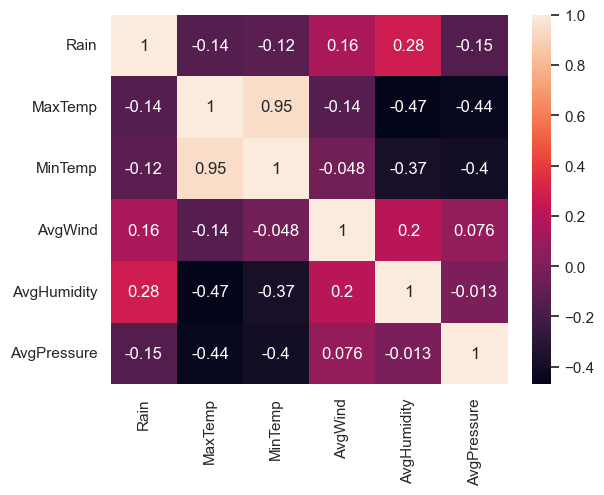

In [318]:
sns.heatmap(corr, annot = True)
plt.show()

# 3. Data Preprocessing and Feature Selection

In [319]:
# Drop columns that are not needed
df.drop(['SunRise', 'SunSet', 'MoonRise', 'MoonSet'], axis = 1, inplace = True)

In [320]:
# Check data
df.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,Partly cloudy,0.0,27,22,23,66,1012
1,01.09.2019,Partly cloudy,0.0,27,22,21,66,1011
2,31.08.2019,Patchy rain possible,0.5,26,22,22,63,1015
3,30.08.2019,Partly cloudy,0.0,27,22,20,64,1016
4,29.08.2019,Partly cloudy,0.0,27,23,24,61,1015


In [321]:
# Convert the "DateTime" column to a pandas DateTime object
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y')

# Extract and store the month from the "DateTime" column
df['Month'] = df['DateTime'].dt.month

# Verify the converted column
df.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure,Month
0,2019-09-02,Partly cloudy,0.0,27,22,23,66,1012,9
1,2019-09-01,Partly cloudy,0.0,27,22,21,66,1011,9
2,2019-08-31,Patchy rain possible,0.5,26,22,22,63,1015,8
3,2019-08-30,Partly cloudy,0.0,27,22,20,64,1016,8
4,2019-08-29,Partly cloudy,0.0,27,23,24,61,1015,8


In [322]:
# drop DateTime, Year and Day
df.drop(['DateTime'], axis = 1, inplace = True)
df.drop(['Year'], axis = 1, inplace = True)
df.drop(['Day'], axis = 1, inplace = True)

KeyError: "['Year'] not found in axis"

In [323]:
# Check data
df.head()

,Condition,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure,Month
0,Partly cloudy,0.0,27,22,23,66,1012,9
1,Partly cloudy,0.0,27,22,21,66,1011,9
2,Patchy rain possible,0.5,26,22,22,63,1015,8
3,Partly cloudy,0.0,27,22,20,64,1016,8
4,Partly cloudy,0.0,27,23,24,61,1015,8


# 4. Model Selection and Training

In [324]:
# split data into X and y
X = df.drop('Condition', axis = 1)
y = df['Condition']

In [325]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [326]:
# Scale the input variables (Optional for Random Forest, necessary for SVM, KNN, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [327]:
# save data frame df to csv
df.to_csv('data/df.csv', index = True)

In [328]:
# from df.csv drop column Condition
df.drop(['Condition'], axis = 1, inplace = True)

# save data frame df to csv
df.to_csv('data/df_test.csv', index = True)

# Comparing 14 classifiers

In [252]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [256]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [257]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    scores.append(score)
    print(f"{name}:{score}")

Nearest_Neighbors:0.5794871794871795
Linear_SVM:0.6461538461538462
Polynomial_SVM:0.6282051282051282
RBF_SVM:0.6217948717948718
Gradient_Boosting:0.5525641025641026
Decision_Tree:0.6192307692307693
Extra_Trees:0.6269230769230769
Random_Forest:0.6576923076923077
Neural_Net:0.6653846153846154
AdaBoost:0.5769230769230769
Naive_Bayes:0.5858974358974359
SGD:0.6115384615384616


In [259]:
df_scores = pd.DataFrame()
df_scores['name'] = names
df_scores['score'] = scores
df_scores

,name,score
0,Nearest_Neighbors,0.579487
1,Linear_SVM,0.646154
2,Polynomial_SVM,0.628205
3,RBF_SVM,0.621795
4,Gradient_Boosting,0.552564
5,Decision_Tree,0.619231
6,Extra_Trees,0.626923
7,Random_Forest,0.657692
8,Neural_Net,0.665385
9,AdaBoost,0.576923


In [276]:
# df_scores in descending order
df_scores = df_scores.sort_values(by='score', ascending=False)

In [277]:
cm = sns.light_palette("green", as_cmap=True)
s = df_scores.style.background_gradient(cmap=cm)
s

,name,score
8,Neural_Net,0.665385
7,Random_Forest,0.657692
1,Linear_SVM,0.646154
2,Polynomial_SVM,0.628205
6,Extra_Trees,0.626923
3,RBF_SVM,0.621795
5,Decision_Tree,0.619231
11,SGD,0.611538
10,Naive_Bayes,0.585897
0,Nearest_Neighbors,0.579487


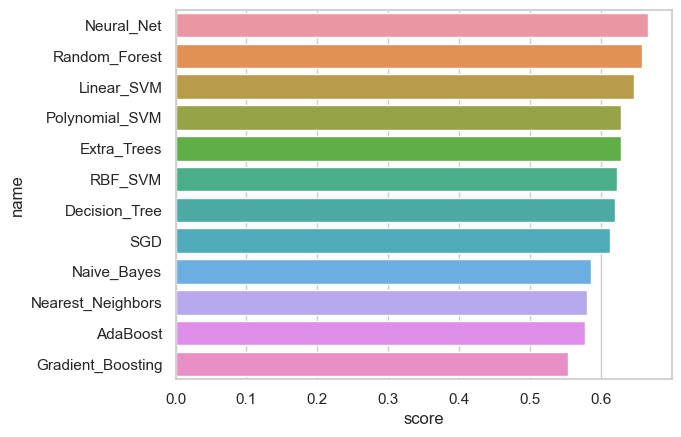

In [279]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df_scores, )
plt.show(ax)

### The best classifier for this case seems to be the Neural_Net

# Hyper Paremeter Tuning

In [302]:
# Define the parameter grid for the MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 500, 1000],
}

In [303]:
# Create a MLPClassifier object
neural_network = MLPClassifier()

# Create the GridSearchCV object with the parameter grid
grid_search = GridSearchCV(estimator=neural_network, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")


/Users/erictak/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/erictak/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/erictak/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/erictak/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/erictak/miniconda3/lib/python3.10/site-packages/sklearn

Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'adam'}
Best score: 0.6643150388936906


/Users/erictak/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'adam'}
Best score: 0.6643150388936906

In [304]:
# Train the MLPClassifier with the best parameters on the entire training set
best_nn = MLPClassifier(**best_params)
best_nn.fit(X_train_scaled, y_train)

# Evaluate the performance on the test set
test_score = best_nn.score(X_test_scaled, y_test)
print(f"Test score: {test_score}")

Test score: 0.6564102564102564


/Users/erictak/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [305]:
with open('best_nn_model.pkl', 'wb') as f:
    pickle.dump(best_nn, f)